# OVERVIEW ON DATA

In [26]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [27]:
RESOURCE_PATH = os.path.join('../','resources')
CLEANED_FILE_PATH = '../resources/cleaned_data/cleaned_film_data.csv'
FILM_PATH = os.path.join(RESOURCE_PATH, 'data', 'split_film_data')
RATINGS_PATH = os.path.join(RESOURCE_PATH, 'data', 'split_ratings')
csv_files = [
    'film_data_part1.csv',
    'film_data_part2.csv',
    'film_data_part3.csv',
    'film_data_part4.csv'
]


In [28]:
film_data_frames = [pd.read_csv(os.path.join(FILM_PATH, file)) for file in csv_files]
film_data = pd.concat(film_data_frames, ignore_index=True)
print(film_data.describe())
print(film_data.info())

                fid   ratingCount  ratingValue      duration
count  9.816000e+03  9.816000e+03  9816.000000   8818.000000
mean   2.566056e+06  1.132511e+05     6.872311   6344.343389
std    4.047172e+06  1.886956e+05     1.075006   1565.277352
min    1.200000e+01  6.968000e+03     1.200000     60.000000
25%    1.124688e+05  2.690450e+04     6.200000   5580.000000
50%    7.874995e+05  5.032350e+04     6.900000   6240.000000
75%    3.014430e+06  1.151045e+05     7.600000   7080.000000
max    3.032115e+07  2.975583e+06    10.000000  28020.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9816 entries, 0 to 9815
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fid            9816 non-null   int64  
 1   name           9816 non-null   object 
 2   description    9816 non-null   object 
 3   ratingCount    9816 non-null   int64  
 4   ratingValue    9816 non-null   float64
 5   contentRating  9740 non-null   

In [29]:
print(film_data.shape)
print(film_data.isnull().sum())
film_data.head(2) # 13 col 
# (9815, 13)
# fid                0
# name               0
# description        0
# ratingCount        0
# ratingValue        0
# contentRating     76
# genre              0
# keywords           7
# duration           0
# datePublished      0
# actor              9
# director         975
# image              0
# dtype: int64



(9816, 13)
fid                0
name               0
description        0
ratingCount        0
ratingValue        0
contentRating     76
genre              0
keywords           7
duration         998
datePublished     58
actor              9
director         975
image              0
dtype: int64


,fid,name,description,ratingCount,ratingValue,contentRating,genre,keywords,duration,datePublished,actor,director,image
0,468569,The Dark Knight,When a menace known as the Joker wreaks havoc ...,2956401,9.0,P,"Action,Crime,Drama","psychopath,superhero,moral dilemma,clown,crimi...",9120.0,2008-08-29,"Christian Bale,Heath Ledger,Aaron Eckhart",Christopher Nolan,https://m.media-amazon.com/images/M/MV5BMTMxNT...
1,1375666,Inception,A thief who steals corporate secrets through t...,2623493,8.8,P,"Action,Adventure,Sci-Fi","dream,ambiguous ending,subconscious,mindbender...",8880.0,2010-08-06,"Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot ...",Christopher Nolan,https://m.media-amazon.com/images/M/MV5BMjAxMz...


In [30]:
rows_with_null = film_data[film_data.isnull().any(axis=1)]
rows_with_null.head()

,fid,name,description,ratingCount,ratingValue,contentRating,genre,keywords,duration,datePublished,actor,director,image
65,903747,Breaking Bad,A chemistry teacher diagnosed with inoperable ...,2247720,9.5,C18,"Crime,Drama,Thriller","cancer,chemistry,drug trade,drug,albuquerque n...",NaN,2008-01-20,"Bryan Cranston,Aaron Paul,Anna Gunn",NaN,https://m.media-amazon.com/images/M/MV5BMzU5ZG...
71,944947,Game of Thrones,Nine noble families fight for control over the...,2375205,9.2,C18,"Action,Adventure,Drama","based on novel,politics,dragon,nudity,queen",NaN,2011-04-17,"Emilia Clarke,Peter Dinklage,Kit Harington",NaN,https://m.media-amazon.com/images/M/MV5BMTNhMD...
165,4574334,Stranger Things,"In 1980s Indiana, a group of young friends wit...",1399967,8.7,C16,"Drama,Fantasy,Horror","government conspiracy,1980s,friendship,monster...",NaN,2016-07-15,"Millie Bobby Brown,Finn Wolfhard,Winona Ryder",NaN,https://m.media-amazon.com/images/M/MV5BMjE2N2...
277,108778,Friends,Follows the personal and professional lives of...,1120876,8.9,TV-14,"Comedy,Romance","friendship,friend,new york city,boyfriend girl...",NaN,1994-09-22,"Jennifer Aniston,Courteney Cox,Lisa Kudrow",NaN,https://m.media-amazon.com/images/M/MV5BOTU2Ym...
302,1475582,Sherlock,The quirky spin on Conan Doyle's iconic sleuth...,1027772,9.1,TV-14,"Crime,Drama,Mystery","friendship,detective,genius,murder,modernized ...",NaN,2010-07-25,"Benedict Cumberbatch,Martin Freeman,Una Stubbs",NaN,https://m.media-amazon.com/images/M/MV5BNTQzNG...


# PREPROCESSING

### 1. Content Rating


In [31]:
list_contentRating = film_data['contentRating'].unique()
print(list_contentRating)

['P' 'C16' 'R' 'C13' 'PG-13' 'T13' 'PG' 'C18' 'G' '(Banned)' 'Approved'
 'NC-17' 'T18' 'TV-14' 'TV-MA' 'TV-PG' 'T16' 'Not Rated' 'K' nan 'Passed'
 'TV-Y7-FV' 'M/PG' 'Unrated' 'TV-Y7' 'TV-G' 'GP' 'M' 'X' 'TV-Y' 'T'
 'MA-17' '13+' '16+']


In [32]:
film_data['contentRating'] = film_data['contentRating'].fillna('Not Rated')
list_contentRating = film_data['contentRating'].unique()
print(list_contentRating)

['P' 'C16' 'R' 'C13' 'PG-13' 'T13' 'PG' 'C18' 'G' '(Banned)' 'Approved'
 'NC-17' 'T18' 'TV-14' 'TV-MA' 'TV-PG' 'T16' 'Not Rated' 'K' 'Passed'
 'TV-Y7-FV' 'M/PG' 'Unrated' 'TV-Y7' 'TV-G' 'GP' 'M' 'X' 'TV-Y' 'T'
 'MA-17' '13+' '16+']


In [33]:
['P' 'C16' 'R' 'C13' 'PG-13' 'T13' 'PG' 'C18' 'G' '(Banned)' 'Approved'
 'NC-17' 'T18' 'TV-14' 'TV-MA' 'TV-PG' 'T16' 'Not Rated' 'K' 'Passed'
 'TV-Y7-FV' 'M/PG' 'Unrated' 'TV-Y7' 'TV-G' 'GP' 'M' 'X' 'TV-Y' 'T'
 'MA-17' '13+' '16+']

content_rating_mapping = {'PG':['P','PG','TV-MA','TV-PG','M/PG'],
                          'PG-16':['C16','16+','T16', 'T'], 
                          'PG-13':['C13','13+','PG-13','T13','TV-14'],
                          'General':['G','Approved','TV-G','Passed','GP'],
                          'Banned':['(Banned)'], 
                          'Adults':['NC-17','T18','M','X','MA-17','R','C18'],
                          'Not Rated':['Not Rated', 'Unrated'],
                          'Children':['K','TV-Y7-FV','TV-Y7', 'TV-Y']
                          }

In [34]:
reverse_mapping = {rating: category for category, ratings in content_rating_mapping.items() for rating in ratings}

# Replace content ratings using the reverse mapping
film_data['contentRating'] = film_data['contentRating'].map(reverse_mapping)
list_contentRating = film_data['contentRating'].unique()
print(list_contentRating)

['PG' 'PG-16' 'Adults' 'PG-13' 'General' 'Banned' 'Not Rated' 'Children']


### 2. Duration


In [35]:
mean_duration = film_data['duration'].mean()
film_data['duration'] = film_data['duration'].fillna(mean_duration)
print(film_data['duration'].isnull().sum())

0


### 3.Keywords

In [36]:
empty_keywords = film_data['keywords'].isnull() | (film_data['keywords'] == '')

def choose_genre(row):
    genres = row['genre'].split(',')  
    return np.random.choice(genres).strip()
film_data.loc[empty_keywords, 'keywords'] = film_data.loc[empty_keywords].apply(choose_genre, axis=1)

print(film_data['keywords'].isnull().sum())

0


### 4. Date Published


In [37]:
# film_data['datePublished'] = film_data['datePublished'].astype(str)
# min_date = film_data['datePublished'][film_data['datePublished'] != ''].min()
# film_data['datePublished'] = film_data['datePublished'].replace('', min_date)

# print(film_data['datePublished'].isnull().sum())

film_data['datePublished'] = pd.to_datetime(film_data['datePublished'], errors='coerce')

valid_dates = film_data['datePublished'].dropna()
mean_year = valid_dates.dt.year.mean()
mean_month = valid_dates.dt.month.mean()
mean_day = valid_dates.dt.day.mean()

mean_year = int(round(mean_year))
mean_month = int(round(mean_month))
mean_day = int(round(mean_day))

mean_date = pd.to_datetime(f"{mean_year}-{mean_month:02d}-{mean_day:02d}")

# Fill NaT values with the mean date
film_data['datePublished'] = film_data['datePublished'].fillna(mean_date)
film_data['datePublished'] = film_data['datePublished'].dt.strftime('%Y-%m-%d')

print(film_data['datePublished'].isnull().sum())



0


### 5.Actor


In [38]:
film_data['actor'] = film_data['actor'].fillna('unknown')
film_data['director'] = film_data['director'].fillna('undetermined')
print(film_data['actor'].isnull().sum())
print(film_data['director'].isnull().sum())

0
0


In [51]:
# film_data.to_csv(CLEANED_FILE_PATH, index=False)
# print(f"Cleaned data has been exported to {CLEANED_FILE_PATH}")
print(film_data.isnull().sum())

fid              0
name             0
description      0
ratingCount      0
ratingValue      0
contentRating    0
genre            0
keywords         0
duration         0
datePublished    0
actor            0
director         0
image            0
dtype: int64


# VISUALIZATION

In [40]:
# Visualization
sns.set_theme(style="whitegrid")


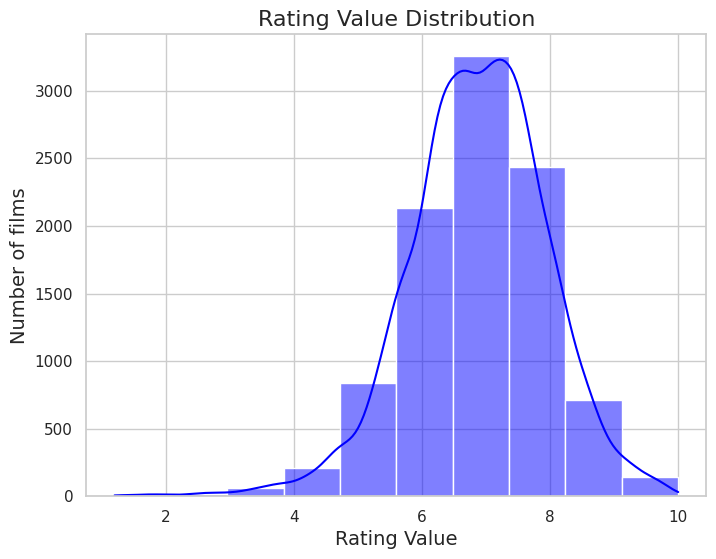

In [41]:
plt.figure(figsize=(8, 6))
sns.histplot(film_data['ratingValue'], kde=True, bins=10, color="blue")
plt.title("Rating Value Distribution", fontsize=16)
plt.xlabel("Rating Value", fontsize=14)
plt.ylabel("Number of films", fontsize=14)
plt.show()

In [42]:
genre_counts = film_data['genre'].str.split(',').explode().value_counts()
print(genre_counts)


genre
Drama          5335
Comedy         3294
Action         2630
Crime          2121
Adventure      2088
Thriller       1607
Horror         1388
Romance        1269
Mystery        1259
Fantasy         830
Sci-Fi          814
Animation       717
Biography       624
Family          477
History         310
Music           243
War             184
Sport           168
Documentary     156
Musical         110
Western         104
Short            88
Film-Noir        64
Talk-Show        12
Reality-TV       10
News              6
Game-Show         5
Name: count, dtype: int64


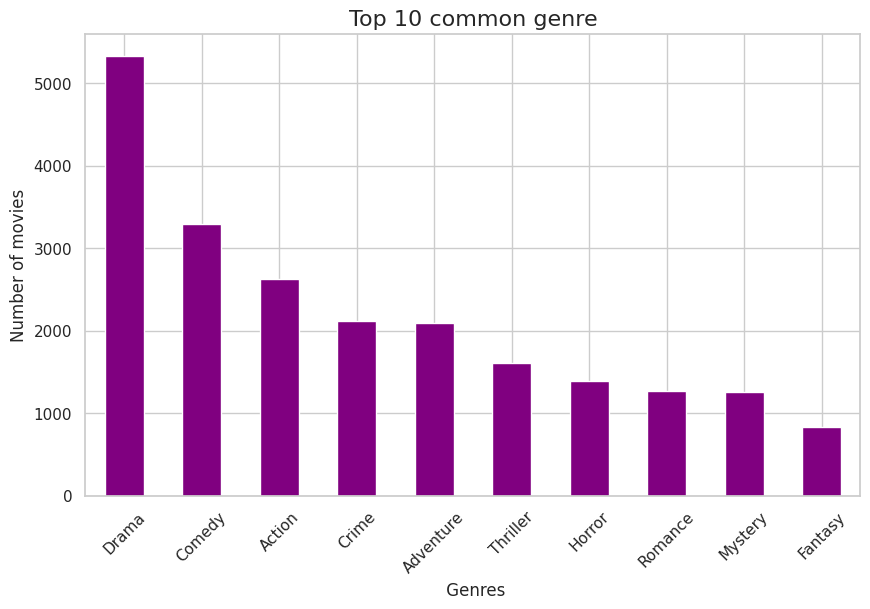

In [43]:
genre_counts.head(10).plot(kind='bar', figsize=(10, 6), color='purple')
plt.title("Top 10 common genre", fontsize=16)
plt.xlabel(" Genres", fontsize=12)
plt.ylabel("Number of movies", fontsize=12)
plt.xticks(rotation=45)
plt.show()


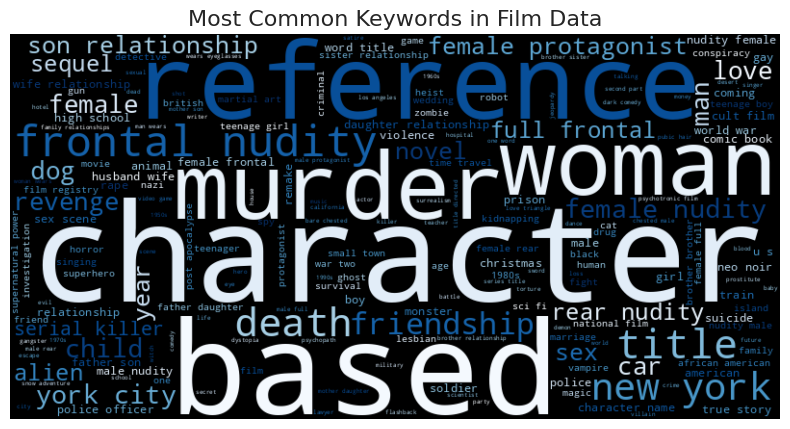

In [44]:
all_keywords = ' '.join(film_data['keywords'].dropna())  # Remove NaN values

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Blues').generate(all_keywords)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.title('Most Common Keywords in Film Data', fontsize=16)
plt.show()

In [45]:
rating_files = [f'ratings_part_{i}.txt' for i in range(1, 11)]
ratings_dataframes = []

for file in rating_files:
    file_path = os.path.join(RATINGS_PATH, file)
    try:
        df = pd.read_csv(file_path, delimiter=',', header=None, names=['user_id','film_id', 'rating'])
        ratings_dataframes.append(df)
    except Exception as e:
        print(f"Không thể đọc file {file}: {e}")

ratings_data = pd.concat(ratings_dataframes, ignore_index=True)
print(ratings_data.head())

   user_id  film_id  rating
0   122436   111161       8
1   122436   109830       1
2   122436   110912      10
3   122436   133093       1
4   122436    68646      10


In [46]:
print(ratings_data.describe())
print(ratings_data.info())

            user_id       film_id        rating
count  4.697405e+06  4.697405e+06  4.697405e+06
mean   3.761237e+07  1.970860e+06  6.981823e+00
std    3.656264e+07  3.264181e+06  2.062400e+00
min    6.600000e+01  1.200000e+01  1.000000e+00
25%    8.065661e+06  1.191160e+05  6.000000e+00
50%    2.614949e+07  4.717110e+05  7.000000e+00
75%    5.592670e+07  2.092588e+06  8.000000e+00
max    1.911796e+08  3.032115e+07  1.000000e+01
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4697405 entries, 0 to 4697404
Data columns (total 3 columns):
 #   Column   Dtype
---  ------   -----
 0   user_id  int64
 1   film_id  int64
 2   rating   int64
dtypes: int64(3)
memory usage: 107.5 MB
None


In [47]:
print(ratings_data.shape)
print(ratings_data.isnull().sum())
ratings_data.head(2) # 3 cols

(4697405, 3)
user_id    0
film_id    0
rating     0
dtype: int64


,user_id,film_id,rating
0,122436,111161,8
1,122436,109830,1


/tmp/ipykernel_914/3348769565.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


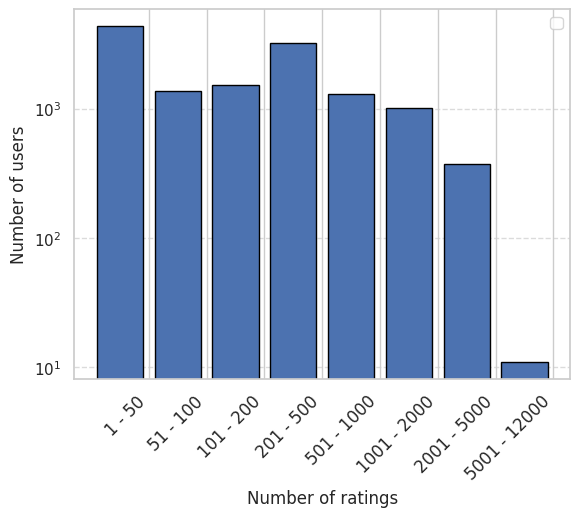

In [48]:
user_rating_count = ratings_data['user_id'].value_counts().to_numpy()
bins = [0,50,100,200, 500, 1000, 2000, 5000, 12000]
hist, bin_edges = np.histogram(user_rating_count,bins)

fig,ax = plt.subplots()
bar_width = 0.8
ax.bar(range(len(hist)),hist,width=bar_width,edgecolor='black')

ax.set_xticks([0.5+i for i,j in enumerate(hist)])
ax.set_yscale('log')
ax.set_xticklabels(['{} - {}'.format(bins[i]+1,bins[i+1]) for i,j in enumerate(hist)], rotation=45, ha='right', fontsize=12)

plt.grid(axis='y', linestyle = '--', alpha = 0.7)
plt.legend()
plt.ylabel('Number of users')
plt.xlabel('Number of ratings')
plt.show()

/tmp/ipykernel_914/3504065711.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


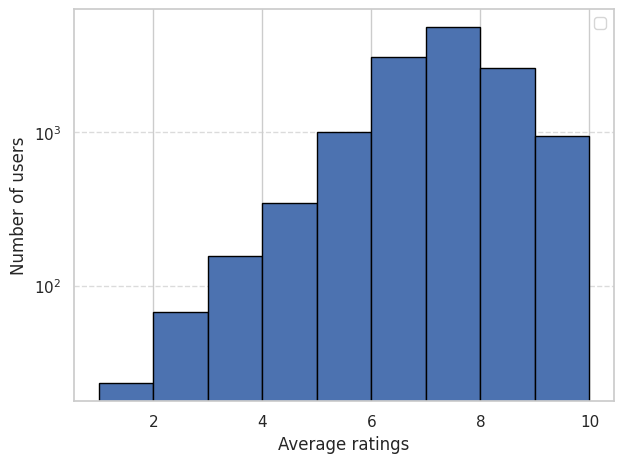

In [49]:
avg_ratings = ratings_data.groupby('user_id')['rating'].mean().to_numpy()
bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.hist(avg_ratings,bins = bins, edgecolor='black', log=True)
plt.legend()

plt.xlabel('Average ratings')
plt.ylabel('Number of users')

plt.grid(axis='y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

/tmp/ipykernel_914/3910220372.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


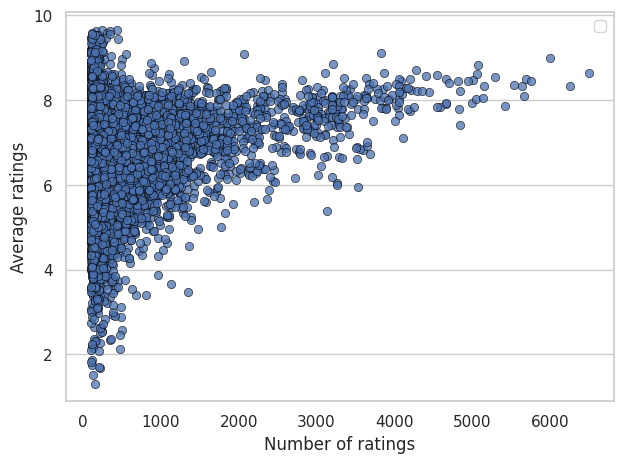

In [50]:
movie_ratings_avg = ratings_data.groupby('film_id')['rating'].mean().to_numpy()
movie_ratings_cnt = ratings_data.groupby('film_id')['rating'].count().to_numpy()
plt.scatter(movie_ratings_cnt, movie_ratings_avg, edgecolor='black', linewidth=0.5, alpha=0.75)
plt.legend()

plt.xlabel('Number of ratings')
plt.ylabel('Average ratings')

plt.grid(axis='x')
plt.tight_layout()
plt.show()